In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale


In [3]:
df = pd.read_csv('houseprice.csv',usecols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


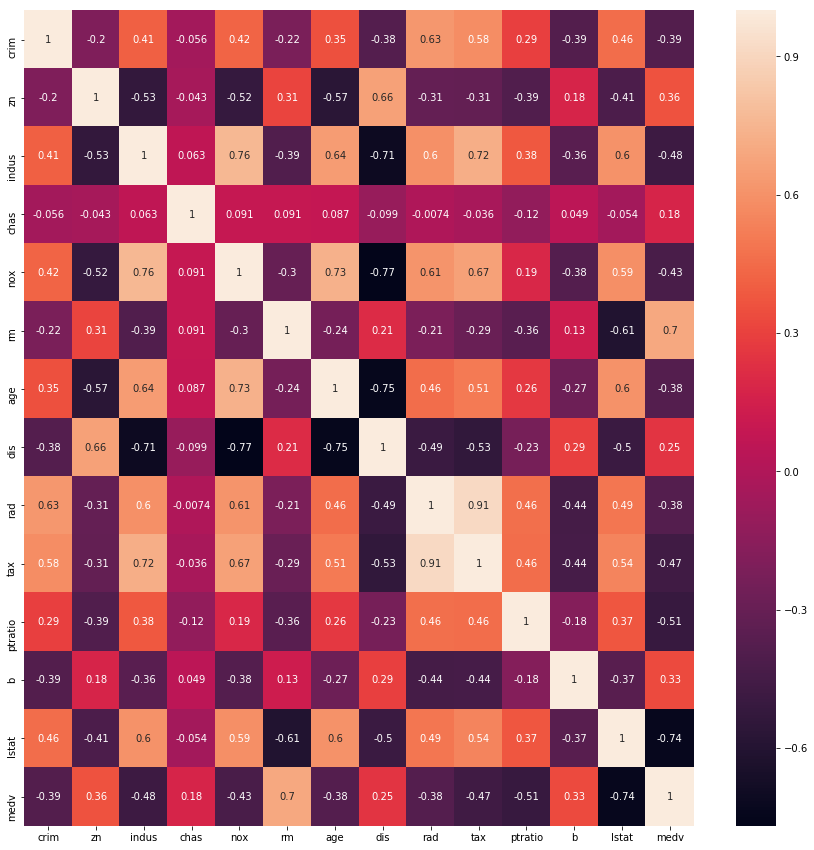

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
# pass the axis to draw on
corr = df.corr()
sns.heatmap(corr, ax=ax,annot = True)
plt.show()

In [8]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
## Top 3 correlations

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=14):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
rad    tax    0.910228
nox    dis    0.769230
indus  nox    0.763651
dtype: float64


Predictor: crim
Residual sum of squares: 9761.42
Mean absolute error: 6.01683552716
Mean Squared Error: 64.2198502743


Predictor: zn
Residual sum of squares: 9553.00
Mean absolute error: 5.84276921926
Mean Squared Error: 62.848657567


Predictor: indus
Residual sum of squares: 8311.21
Mean absolute error: 5.59261916042
Mean Squared Error: 54.6789927156


Predictor: chas
Residual sum of squares: 12091.40
Mean absolute error: 6.60266691147
Mean Squared Error: 79.5486741551


Predictor: nox
Residual sum of squares: 9119.61
Mean absolute error: 6.02494982669
Mean Squared Error: 59.9974082457


Predictor: rm
Residual sum of squares: 6133.42
Mean absolute error: 4.31422410408
Mean Squared Error: 40.3514496979


Predictor: age
Residual sum of squares: 9492.40
Mean absolute error: 5.91236498798
Mean Squared Error: 62.4500126306


Predictor: dis
Residual sum of squares: 10879.98
Mean absolute error: 6.36649804501
Mean Squared Error: 71.5788003377


Predictor: rad
Residual sum of squares: 10089

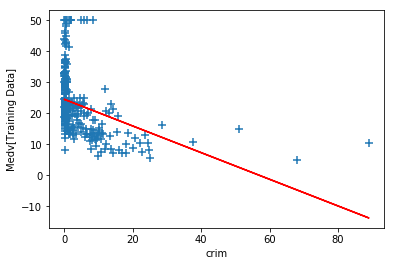

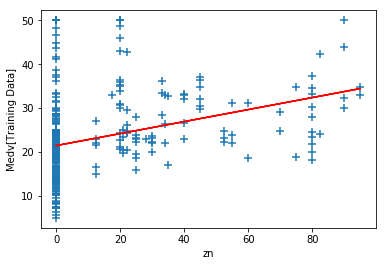

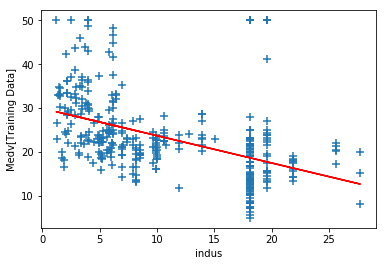

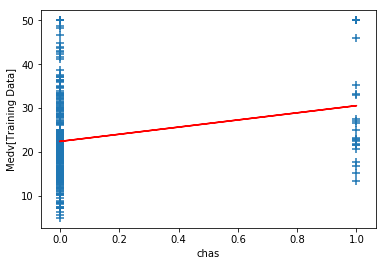

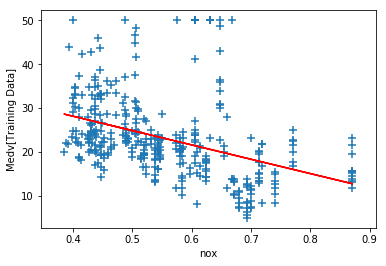

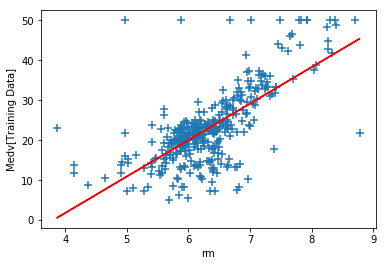

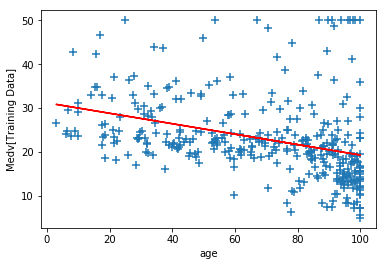

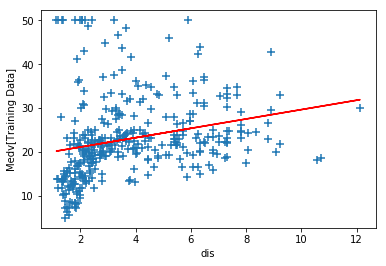

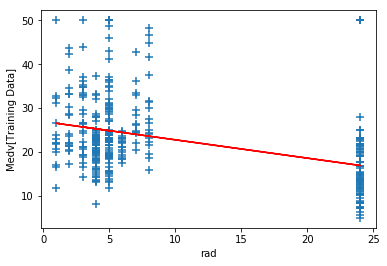

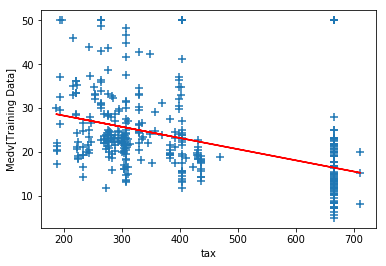

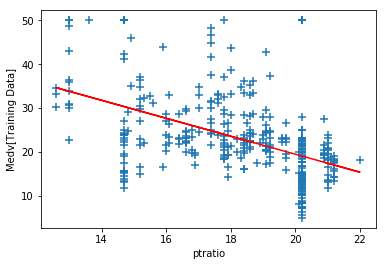

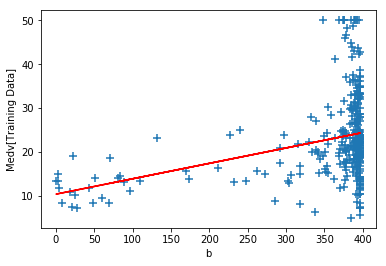

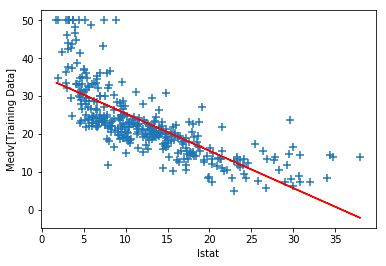

In [17]:
## Simple linear regression with training and testing split on data

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
%matplotlib inline

feature_cols = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
X = df[feature_cols]
y = df['medv']

for i in X.columns:
    X_train, X_test, y_train, y_test = train_test_split(df[i], y, test_size=0.30, random_state=42)
    regr = skl_lm.LinearRegression()
    n_xtrain= X_train.values.reshape(-1,1)
    n_ytrain = y_train.values.reshape(-1,1)
    regr.fit(n_xtrain, n_ytrain)
    n_xtest = X_test.values.reshape(-1,1)
    y_pred = regr.predict(n_xtest)
    y_test = y_test.values.reshape(-1,1)
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RSS = np.sum((y_test - y_pred) ** 2)
    
    print("Predictor:",i)
    print("Residual sum of squares: %.2f" % RSS)
    print("Mean absolute error:",MAE)
    print("Mean Squared Error:",MSE)
    print("\n")
    
    plt.figure()
    plt.scatter(n_xtrain, n_ytrain,s=80,marker = "+")
    plt.plot(n_xtrain,n_xtrain*regr.coef_+regr.intercept_,'red')
    plt.xlabel(i)
    plt.ylabel("Medv[Training Data]")
    
     


In [18]:
## Multiple linear regression with splitting of the data

from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
X = df[feature_cols]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regr = skl_lm.LinearRegression()
regr.fit(X_train, y_train)

print("Mean absolute error:",metrics.mean_absolute_error(y_test,regr.predict(X_test)))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,regr.predict(X_test)))
print("Residual Sum square of error:",np.sum((y_test - regr.predict(X_test))**2))

Mean absolute error: 3.16270987146
Mean Squared Error: 21.5174442312
Residual Sum square of error: 3270.6515231389817


In [16]:
##Multiple linear regression without splitting of the data

from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
X = df[feature_cols]
y = df['medv']

regr = skl_lm.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)
print("regression coefficients:",regr.coef_)
print("regression intercept:",regr.intercept_)
print("Mean Squared Error:",metrics.mean_squared_error(y, y_pred))
print("Residual Sum square of error:",np.sum((y - y_pred)**2))

regression coefficients: [ -1.08011358e-01   4.64204584e-02   2.05586264e-02   2.68673382e+00
  -1.77666112e+01   3.80986521e+00   6.92224640e-04  -1.47556685e+00
   3.06049479e-01  -1.23345939e-02  -9.52747232e-01   9.31168327e-03
  -5.24758378e-01]
regression intercept: 36.4594883851
Mean Squared Error: 21.8948311817
Residual Sum square of error: 11078.784577954986


In [25]:
## Simple Linear regression without splitting the data 

feature_cols = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
X = df[feature_cols]
y = df['medv']

for i in X.columns:
    regr = skl_lm.LinearRegression()
    X_ = df[i].values.reshape(-1,1)
    regr.fit(X_,y)
    y_pred = regr.predict(X_)
    
    MAE = metrics.mean_absolute_error(y,y_pred)
    MSE = metrics.mean_squared_error(y,y_pred)
    RSS = np.sum((y - y_pred) ** 2)
    
    print("Predictor:",i)
    print("Residual sum of squares: %.2f" % RSS)
    print("Mean absolute error:",MAE)
    print("Mean Squared Error:",MSE)
    print("\n")

Predictor: crim
Residual sum of squares: 36275.51
Mean absolute error: 6.1352971864
Mean Squared Error: 71.690735882


Predictor: zn
Residual sum of squares: 37166.56
Mean absolute error: 6.06193133292
Mean Squared Error: 73.4516960948


Predictor: indus
Residual sum of squares: 32721.11
Mean absolute error: 5.77653848025
Mean Squared Error: 64.6662216411


Predictor: chas
Residual sum of squares: 41404.22
Mean absolute error: 6.62789557161
Mean Squared Error: 81.8265141193


Predictor: nox
Residual sum of squares: 34916.17
Mean absolute error: 5.97132315905
Mean Squared Error: 69.0042883554


Predictor: rm
Residual sum of squares: 22061.88
Mean absolute error: 4.44777290153
Mean Squared Error: 43.6005517712


Predictor: age
Residual sum of squares: 36646.53
Mean absolute error: 5.98474471775
Mean Squared Error: 72.423980929


Predictor: dis
Residual sum of squares: 40048.05
Mean absolute error: 6.36483101791
Mean Squared Error: 79.1463415861


Predictor: rad
Residual sum of squares: 3